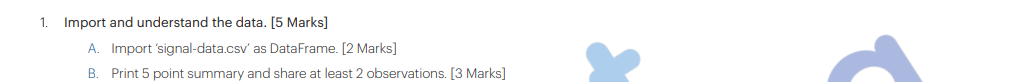

In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv(r"C:\Users\arjit\Desktop\Python\Feature, Model Selection, and Tuning\signal-data.csv")

In [35]:
df.shape

(1567, 592)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


The average of -0.867262 and a standard deviation of 0.498010 in the "Pass/Fail" column indicates that, on average, the dataset leans towards a pass (closer to -1). This hints at a potential imbalance, with more instances of passes than fails.

Given the dataset's 590 features, it becomes crucial to pinpoint the most relevant signals contributing to yield excursions. Features lacking significant contribution to the predictive power of the model are potential candidates for removal.

In [37]:
# Before the loop
print("Null percentages before:")
print(df.isnull().mean() * 100)

Null percentages before:
Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64


In [38]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [39]:
# Before the loop
print("DataFrame shape before:", df.shape)

DataFrame shape before: (1567, 592)


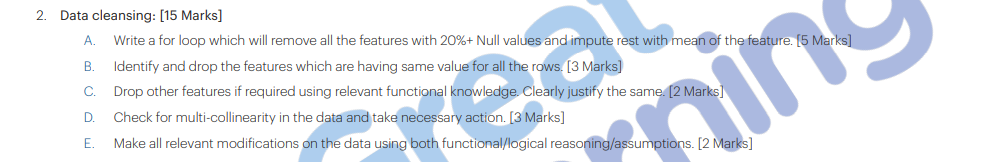

In [40]:
# dropping the first column 'Time'
df.drop(columns=['Time'], inplace=True)

# checking the shape of the data after deleting a column
print(df.shape)

(1567, 591)


Removing Columns with 20% or More Null Values and Imputing Null Values with Mean for Numeric Columns


In [41]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Calculate the percentage of null values in the current column
    null_percentage = df[column].isnull().mean() * 100
    
    # Check if the null percentage is greater than or equal to 20%
    if null_percentage >= 20:
        # Remove the column if null percentage is 20% or more
        df.drop(column, axis=1, inplace=True)
    else:
        # Impute null values with the mean for columns with less than 20% null values
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# Print the shape of the DataFrame after handling null values
print("DataFrame shape after null value handling:", df.shape)

DataFrame shape after null value handling: (1567, 559)


In [42]:
# After the loop
print("Null percentages before:")
print(df.isnull().mean() * 100)

Null percentages before:
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
            ... 
586          0.0
587          0.0
588          0.0
589          0.0
Pass/Fail    0.0
Length: 559, dtype: float64


### Identify and drop the features which are having same value for all the rows

In [43]:
# Identifying features with the same value for all rows
features_to_drop = df.columns[df.nunique() == 1]

# Droping identified features
df.drop(features_to_drop, axis=1, inplace=True)

# Print the shape of the DataFrame after dropping features
print("DataFrame shape after dropping features:", df.shape)

DataFrame shape after dropping features: (1567, 443)


Objective:
The goal is to eliminate correlated features from a DataFrame where the correlation coefficient exceeds a specified threshold. This process aids the model in generalization and enhances its interpretability.

Inputs:

x: DataFrame containing the features.

threshold: Features having correlations above this threshold will be eliminated.

Output:
A DataFrame is returned, retaining only the features that are not highly correlated with each other.

In [44]:
#Removing the collinear features from data
def remove_collinear_features(x, threshold):

    # Calculatinge the co-relation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterating through the co-relation matrix and comparing relations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [45]:
#Removing columns having more than 70% correlation
#Both positive and negative correlations are considered here
df = remove_collinear_features(df,0.70)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
125 | 122 | 0.71
127 | 122 | 0.96
130 | 122 | 0.83
130 | 127 | 0.79
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.81
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0


437 | 166 | 0.99
437 | 301 | 0.95
439 | 168 | 0.79
439 | 303 | 0.77
440 | 27 | 0.71
440 | 169 | 1.0
440 | 304 | 0.98
441 | 170 | 0.99
441 | 305 | 0.95
442 | 171 | 0.97
442 | 306 | 0.96
443 | 172 | 1.0
443 | 174 | 1.0
443 | 307 | 0.96
443 | 309 | 0.96
444 | 173 | 0.99
444 | 308 | 0.95
445 | 172 | 1.0
445 | 174 | 1.0
445 | 307 | 0.96
445 | 309 | 0.96
445 | 443 | 0.99
446 | 175 | 1.0
446 | 310 | 0.95
447 | 176 | 1.0
447 | 311 | 0.98
448 | 177 | 1.0
448 | 312 | 1.0
452 | 180 | 0.99
452 | 316 | 0.86
453 | 181 | 1.0
453 | 317 | 0.96
454 | 182 | 0.99
454 | 318 | 0.97
455 | 183 | 1.0
455 | 319 | 0.98
456 | 184 | 0.97
456 | 185 | 0.71
456 | 320 | 0.96
456 | 321 | 0.72
457 | 185 | 1.0
457 | 187 | 0.81
457 | 320 | 0.7
457 | 321 | 0.99
457 | 323 | 0.8
457 | 456 | 0.71
459 | 185 | 0.82
459 | 187 | 1.0
459 | 321 | 0.82
459 | 323 | 0.99
459 | 457 | 0.81
467 | 195 | 1.0
467 | 331 | 0.95
469 | 67 | 0.87
469 | 196 | 0.9
469 | 197 | 1.0
469 | 198 | 0.72
469 | 199 | 0.83
469 | 203 | 0.71
469 | 204 | 0.81


In [46]:
df.shape

(1567, 202)

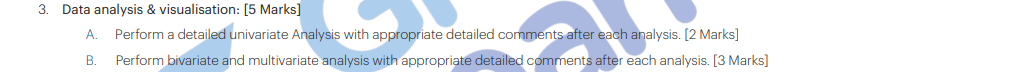

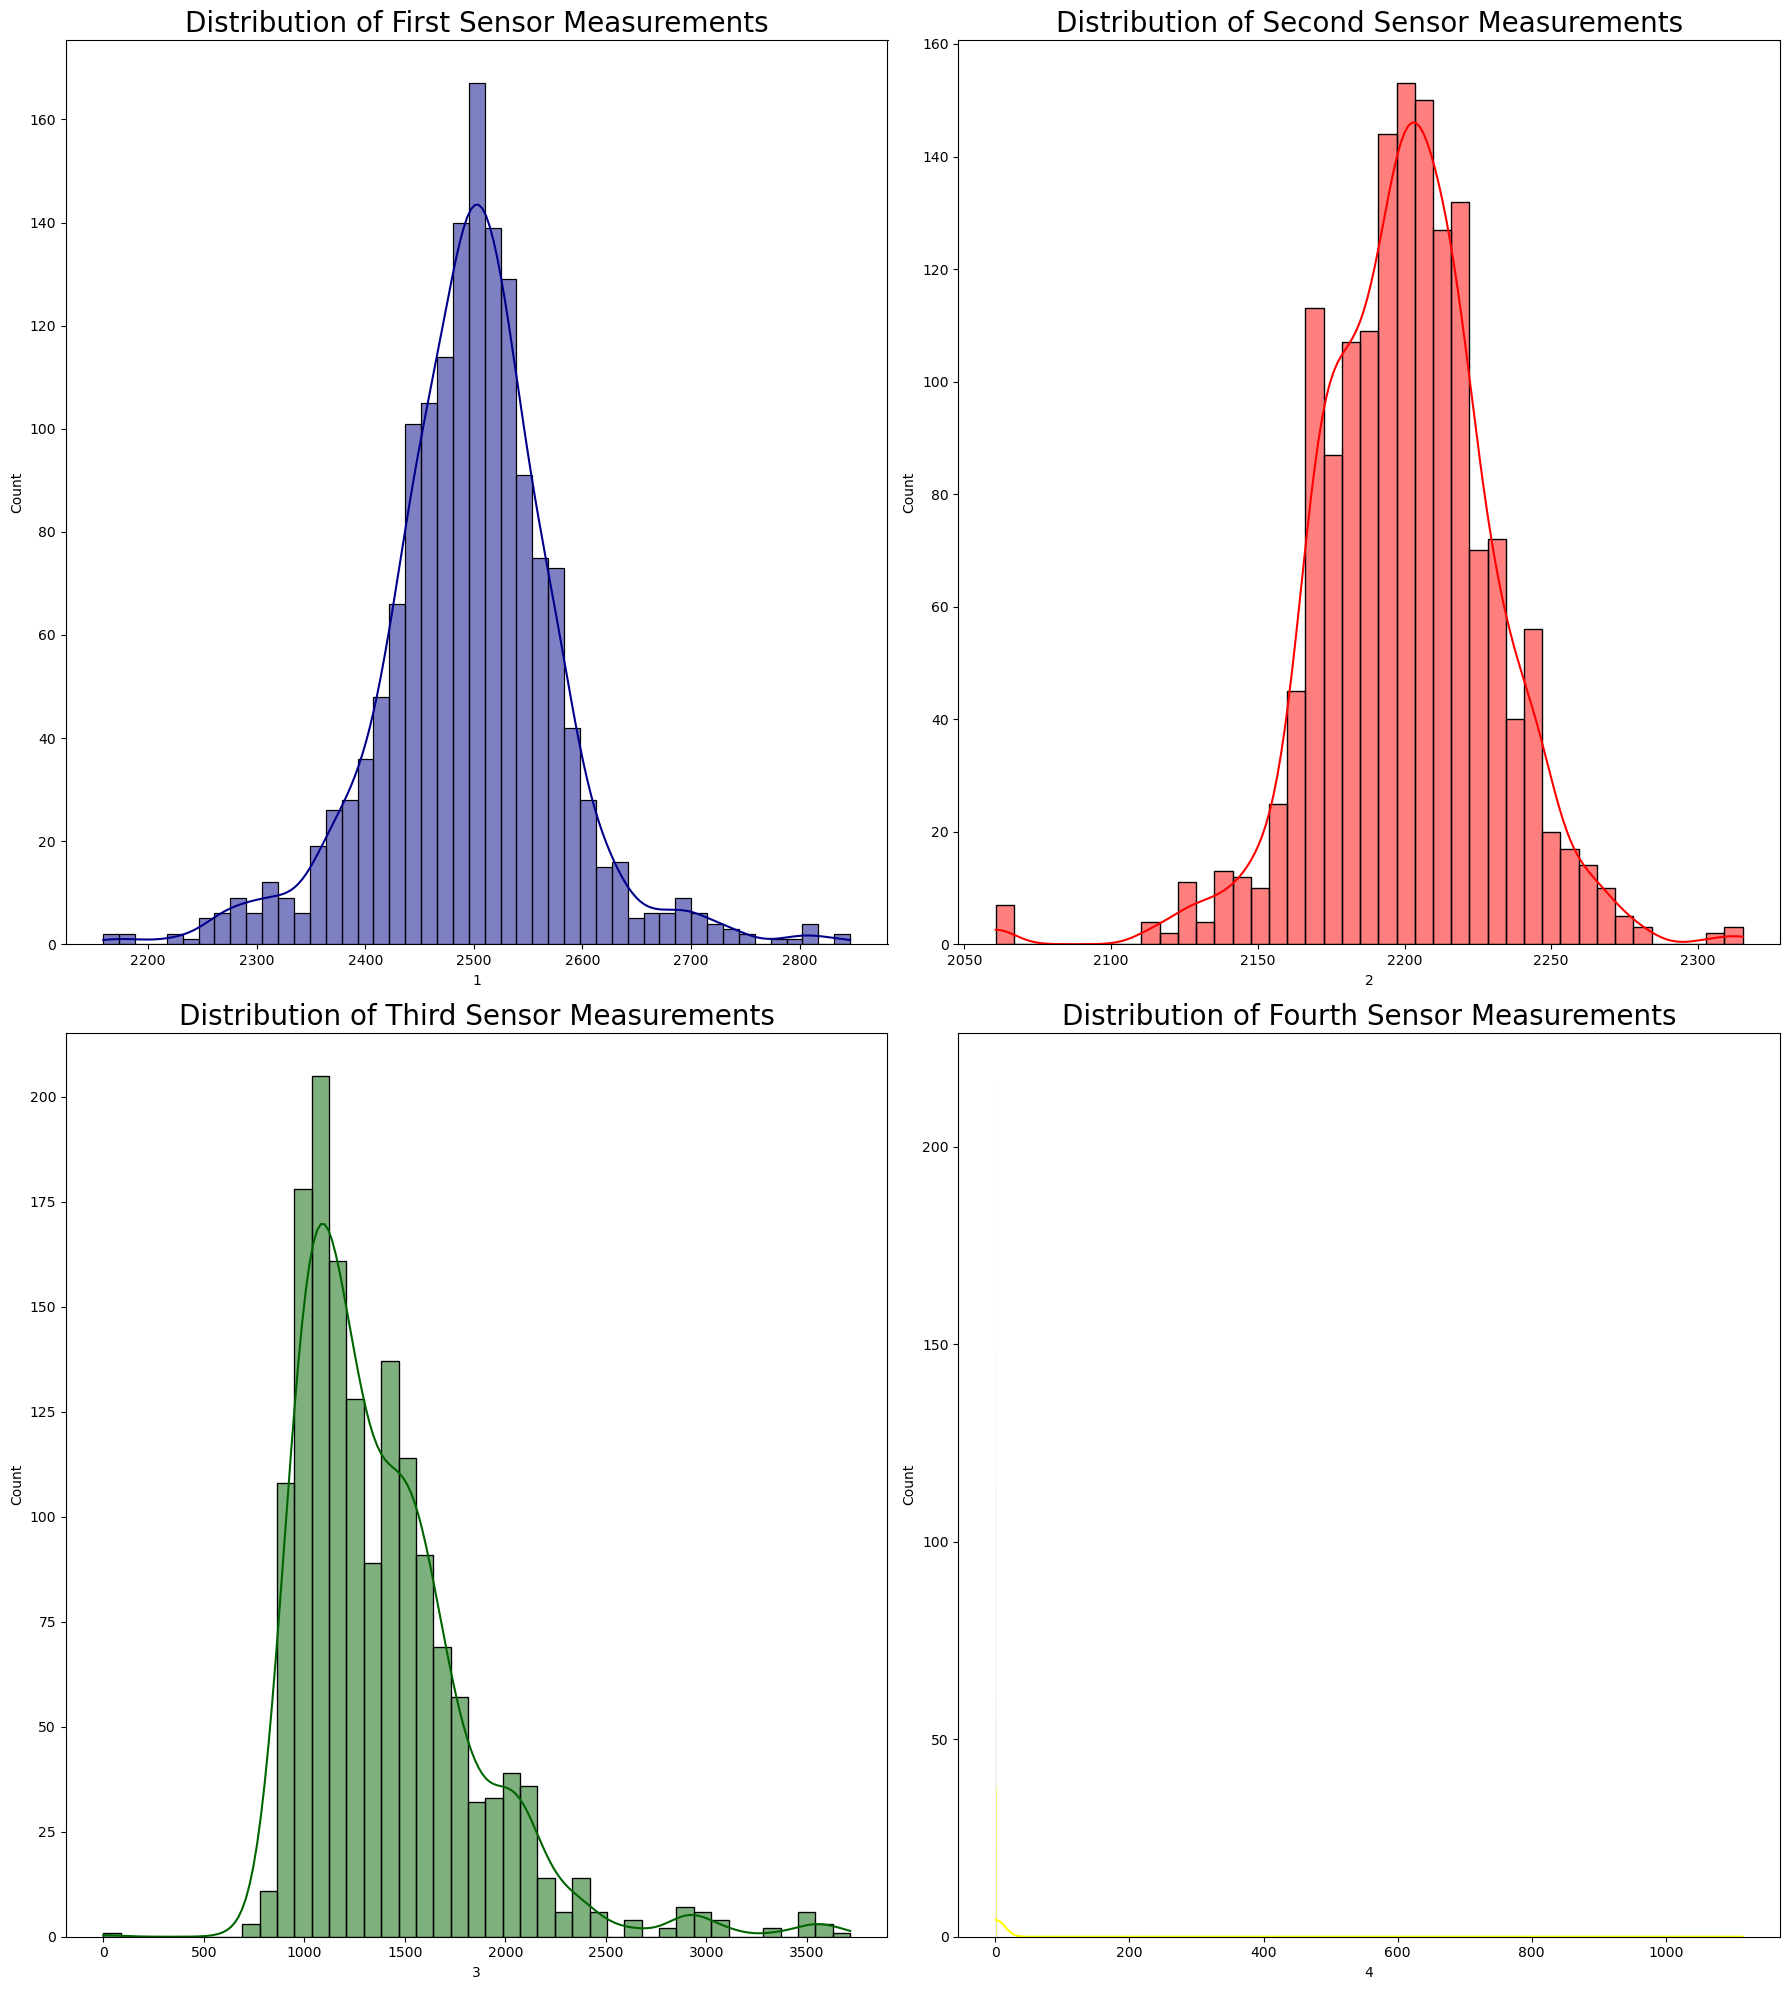

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (18, 20)

# Create subplots for the first four columns' distribution
fig, axes = plt.subplots(2, 2)

# Plot distribution for the first sensor measurement
sns.histplot(df['1'], color='darkblue', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of First Sensor Measurements', fontsize=20)

# Plot distribution for the second sensor measurement
sns.histplot(df['2'], color='red', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Second Sensor Measurements', fontsize=20)

# Plot distribution for the third sensor measurement
sns.histplot(df['3'], color='darkgreen', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Third Sensor Measurements', fontsize=20)

# Plot distribution for the fourth sensor measurement
sns.histplot(df['4'], color='yellow', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Fourth Sensor Measurements', fontsize=20)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Three out of the four sensor measurements in the dataset exhibit a normal distribution, as indicated by bell-shaped curves in their respective histograms. The normal distribution is characterized by symmetry around the mean, a central peak representing the mean value, and a consistent standard deviation determining the spread of the data. This observation suggests that these specific sensors tend to produce measurements that follow a Gaussian distribution.

C:\Users\arjit\AppData\Local\Temp\ipykernel_12880\1234180337.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


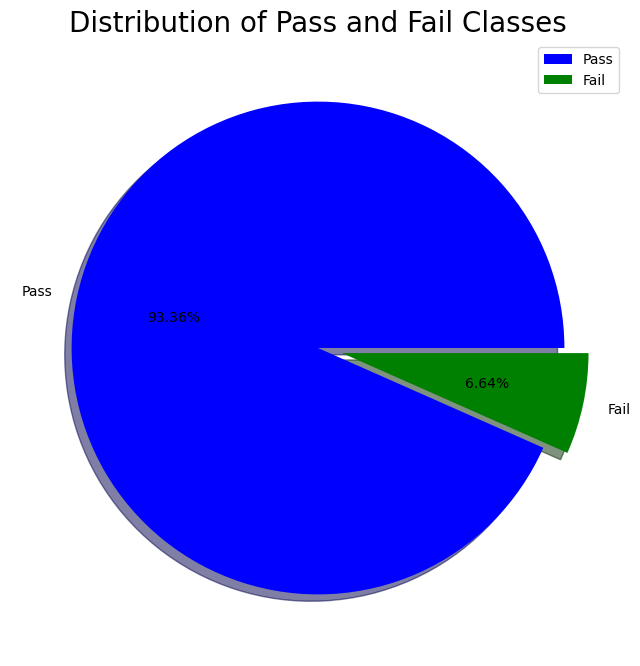

<Axes: >

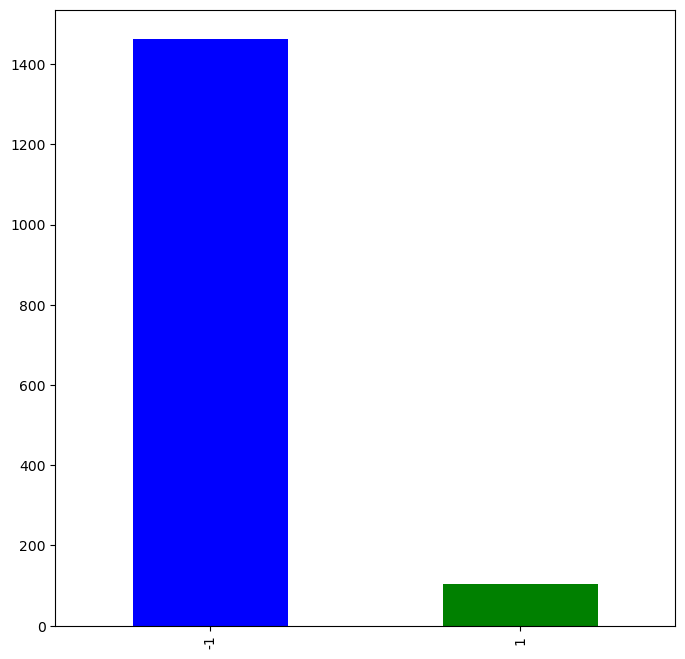

In [48]:
# Define labels, sizes, colors, and explode
labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

# Set plot style and figure size
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)

# Create a pie char
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", shadow=True)

# Hide axis and set title
plt.axis('off')
plt.title('Distribution of Pass and Fail Classes', fontsize=20)

# Show legend and the pie chart
plt.legend()
plt.show()

# Bar chart for class counts
df['Pass/Fail'].value_counts().plot(kind="bar", color=['blue', 'green'])

The distribution of classes in the dataset reveals a significant class imbalance, with the "Pass" class constituting the majority at 93.36%, while the "Fail" class represents a smaller proportion at 6.64%. Class imbalance can impact the performance of machine learning models.

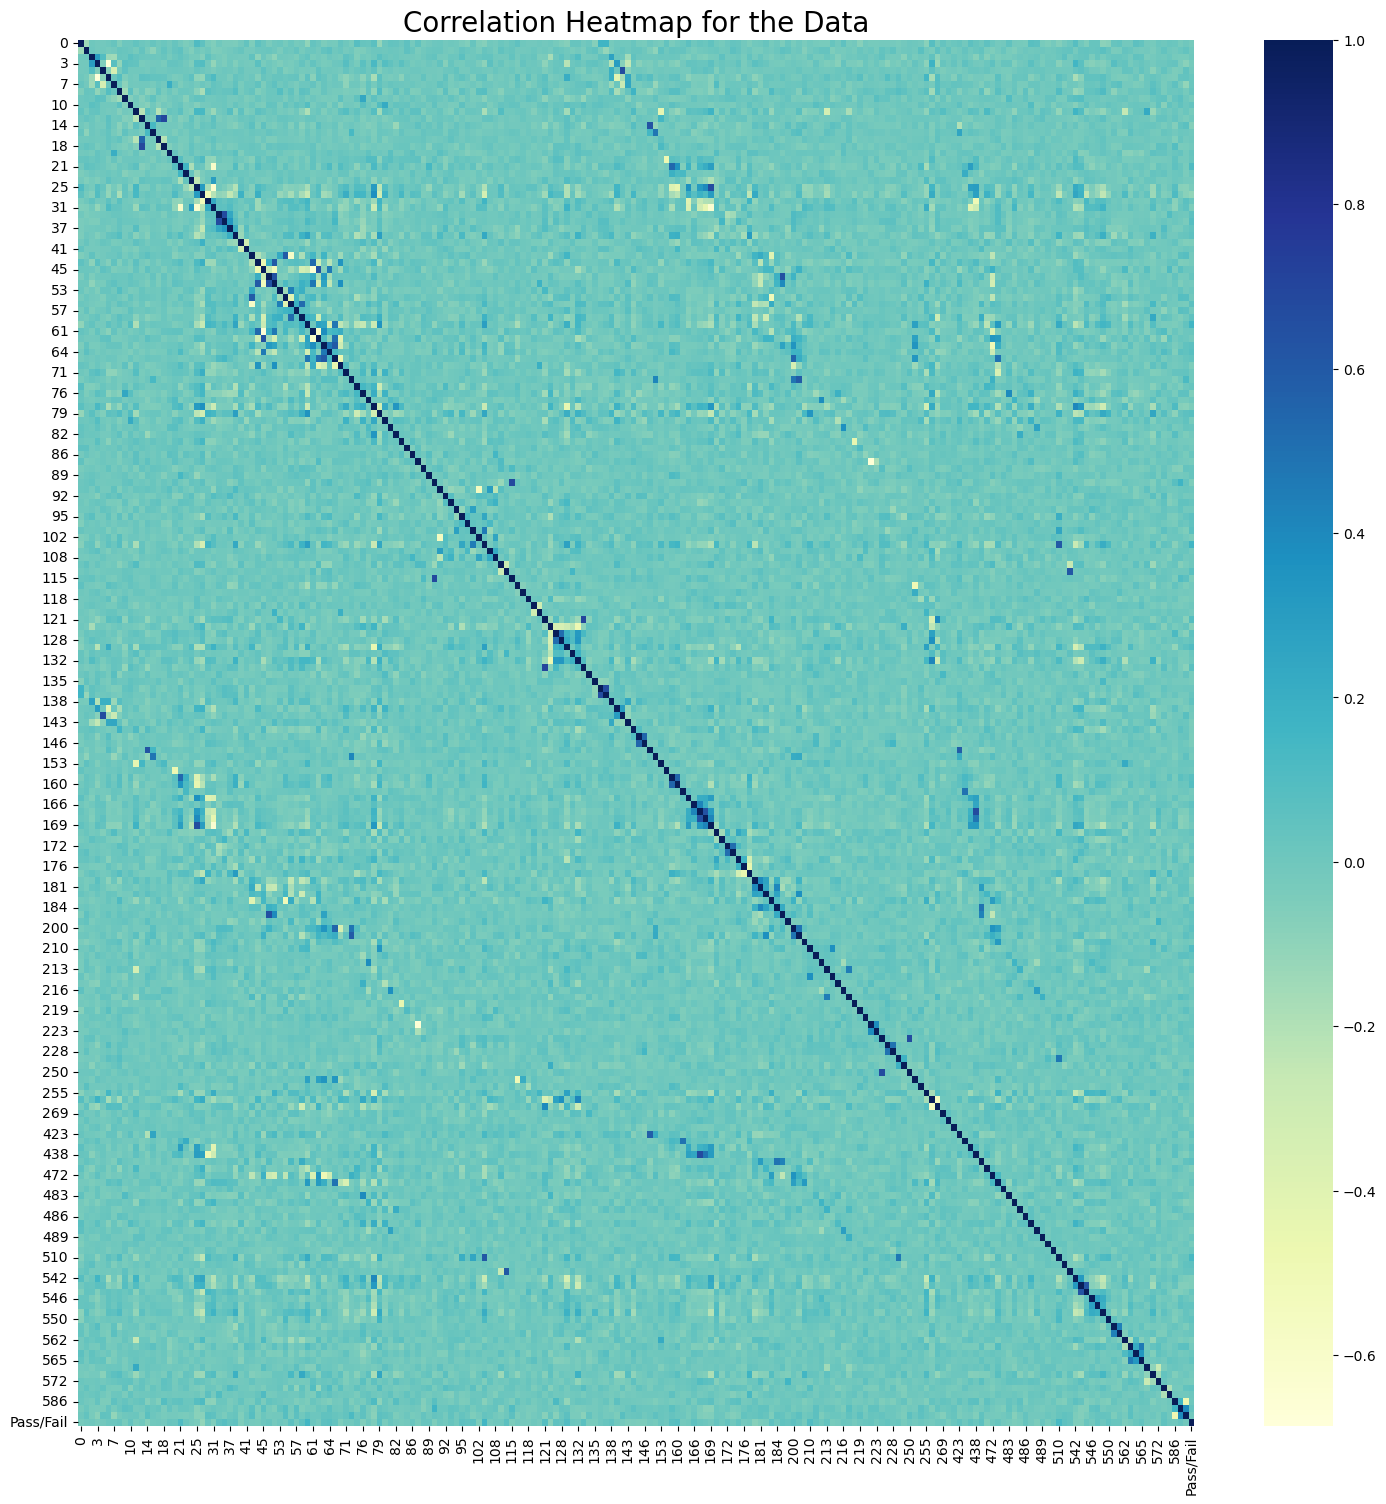

In [49]:
# Set the figure size
plt.rcParams['figure.figsize'] = (18, 18)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(df.corr(), cmap="YlGnBu")

# Set the title for the heatmap
plt.title('Correlation Heatmap for the Data', fontsize=20)

# Show the plot
plt.show()


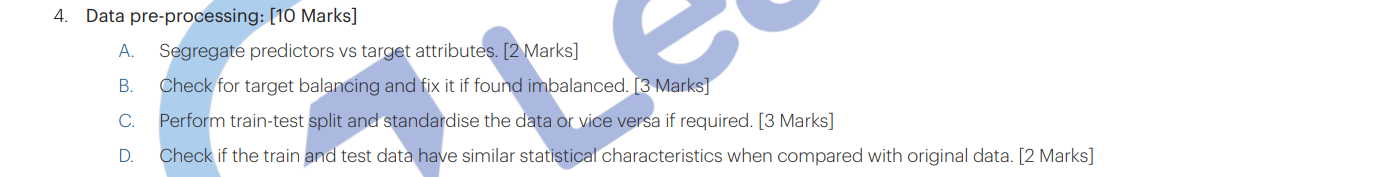

In [50]:
#Segregating predictors vs target attributes
x = df.iloc[:,:201]
y = df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 201)
shape of y: (1567,)


In [51]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
#checking for target balancing and fixing it if found imbalanced
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Checking the distribution of target classes
class_distribution = y.value_counts()
print("Class distribution:\n", class_distribution)

# Checking for target imbalance
is_imbalanced = class_distribution.min() / class_distribution.max() < 0.2  #threshold

if is_imbalanced:
    # If imbalanced, applying SMOTE to balance the classes
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    x_resampled, y_resampled = smote.fit_resample(x, y)

    # Displaying the new class distribution after applying SMOTE
    resampled_class_distribution = pd.Series(y_resampled).value_counts()
    print("\nClass distribution after applying SMOTE:\n", resampled_class_distribution)

    # Updating x and y with resampled data
    x = x_resampled
    y = y_resampled

    print("\nShape of x after balancing:", x.shape)
    print("Shape of y after balancing:", y.shape)
else:
    print("\nNo target imbalance detected.")

Class distribution:
 -1    1463
 1     104
Name: Pass/Fail, dtype: int64

Class distribution after applying SMOTE:
 -1    1463
 1    1463
Name: Pass/Fail, dtype: int64

Shape of x after balancing: (2926, 201)
Shape of y after balancing: (2926,)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Performing train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data using StandardScaler
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

# Print shapes of the resulting datasets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of x_train_standardized:", x_train_standardized.shape)
print("Shape of x_test_standardized:", x_test_standardized.shape)

Shape of x_train: (2340, 201)
Shape of y_train: (2340,)
Shape of x_test: (586, 201)
Shape of y_test: (586,)
Shape of x_train_standardized: (2340, 201)
Shape of x_test_standardized: (586, 201)


Summary Statistics Comparison:
          Original                                                      \
                 0            1            2            3            4   
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                                                                        ...  \
                 6            7            8            9           10  ...   
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000

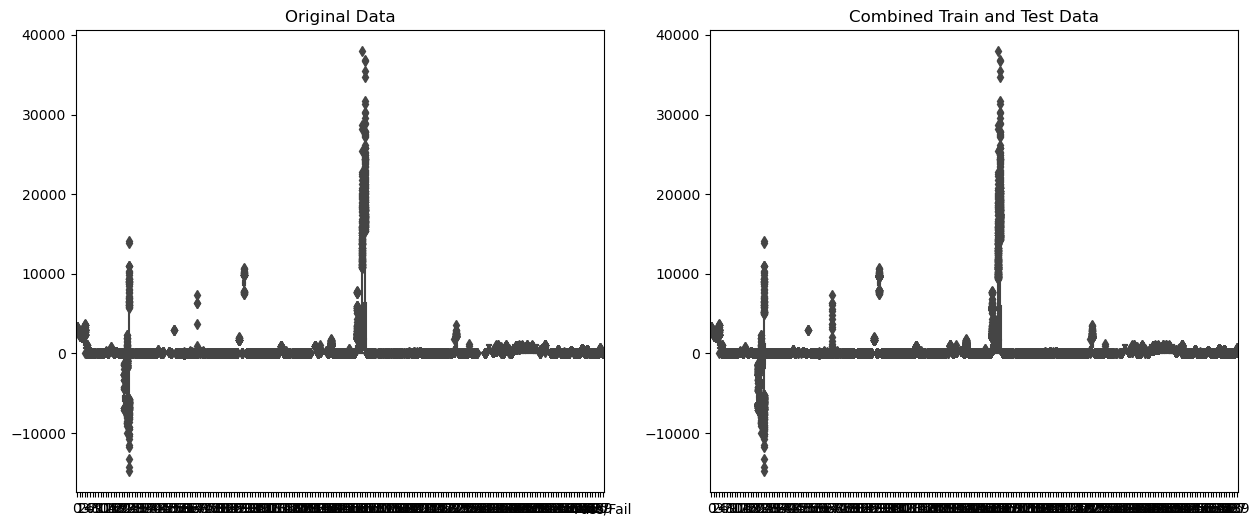

In [54]:
# Concatenate train and test data for original, non-standardized features
x_combined = pd.concat([x_train, x_test])

# Check descriptive statistics for the original data
original_stats = df.describe()

# Check descriptive statistics for the combined train and test data
combined_stats = x_combined.describe()

# Compare summary statistics
stats_comparison = pd.concat([original_stats, combined_stats, original_stats - combined_stats],
                             keys=['Original', 'Combined', 'Difference'],
                             axis=1)

print("Summary Statistics Comparison:")
print(stats_comparison)

# Visualize distributions using boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Original Data")

sns.boxplot(data=x_combined, ax=axes[1])
axes[1].set_title("Combined Train and Test Data")

plt.show()

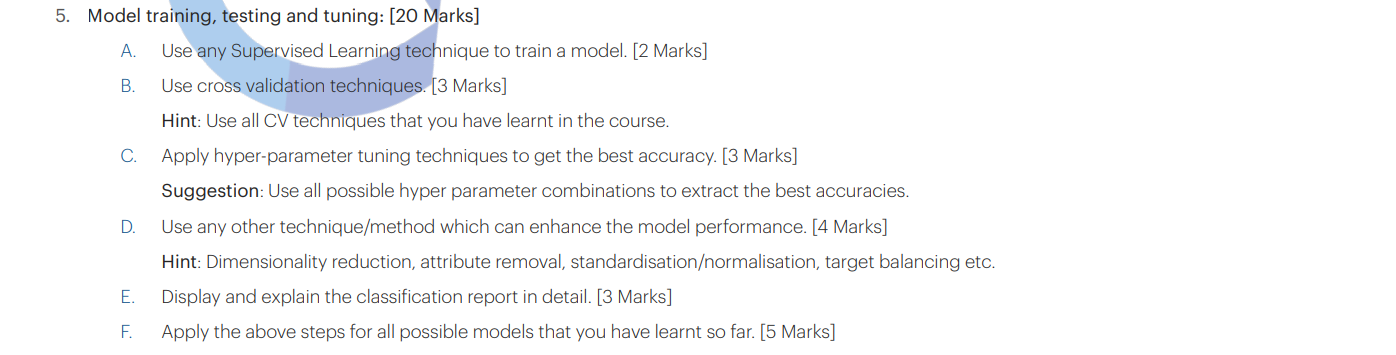

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier on the standardized training data
rf_classifier.fit(x_train_standardized, y_train)

# Make predictions on the standardized test data
y_pred = rf_classifier.predict(x_test_standardized)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.97      0.98       306
           1       0.97      0.97      0.97       280

    accuracy                           0.97       586
   macro avg       0.97      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586



In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Create a Stratified K-Fold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, x_train_standardized, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores: [0.95940171 0.94230769 0.95726496 0.96153846 0.96153846]

Mean Accuracy: 0.96
Standard Deviation: 0.01


In [57]:
from sklearn.model_selection import GridSearchCV

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the reduced hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')

# Perform the grid search
grid_search.fit(x_train_standardized, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(x_test_standardized)

# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Print the results
print(f"\nAccuracy with Best Model: {accuracy_best:.2f}")
print("Classification Report with Best Model:\n", report_best)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy with Best Model: 0.99
Classification Report with Best Model:
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [58]:
from sklearn.decomposition import PCA

# Specify the number of components you want to keep
n_components = 10 
# Initialize PCA
pca = PCA(n_components=n_components)

# Fit and transform on training data
x_train_pca = pca.fit_transform(x_train_standardized)

# Transform test data using the same PCA instance
x_test_pca = pca.transform(x_test_standardized)

# Print the variance explained by each component
print("Variance Explained by Each Component:")
print(pca.explained_variance_ratio_)

# Print the total variance explained
print("\nTotal Variance Explained:")
print(sum(pca.explained_variance_ratio_))

Variance Explained by Each Component:
[0.0442666  0.02559801 0.02419584 0.02303281 0.02100352 0.01920439
 0.0183504  0.01768674 0.01627002 0.01549895]

Total Variance Explained:
0.22510728742650202


In [70]:
# Initialize the Random Forest Classifier with hyperparameters
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100, random_state=42)

# Train the classifier on the PCA-transformed training data
rf_classifier.fit(x_train_pca, y_train)

# Make predictions on the PCA-transformed training data
y_train_pred = rf_classifier.predict(x_train_pca)

# Evaluate the model performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Make predictions on the PCA-transformed test data
y_test_pred = rf_classifier.predict(x_test_pca)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Display train and test accuracies
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.86      0.89       306
           1       0.85      0.92      0.89       280

    accuracy                           0.89       586
   macro avg       0.89      0.89      0.89       586
weighted avg       0.89      0.89      0.89       586


Train Accuracy: 1.00
Test Accuracy: 0.89


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initializing models
lr_classifier_pca = LogisticRegression(random_state=42)
svm_classifier_pca = SVC(random_state=42)
knn_classifier_pca = KNeighborsClassifier()
dt_classifier_pca = DecisionTreeClassifier(random_state=42)
nb_classifier_pca = GaussianNB()

# Train models
lr_classifier_pca.fit(x_train_pca, y_train)
svm_classifier_pca.fit(x_train_pca, y_train)
knn_classifier_pca.fit(x_train_pca, y_train)
dt_classifier_pca.fit(x_train_pca, y_train)
nb_classifier_pca.fit(x_train_pca, y_train)

# Predictions on training data
y_train_pred_lr_pca = lr_classifier_pca.predict(x_train_pca)
y_train_pred_svm_pca = svm_classifier_pca.predict(x_train_pca)
y_train_pred_knn_pca = knn_classifier_pca.predict(x_train_pca)
y_train_pred_dt_pca = dt_classifier_pca.predict(x_train_pca)
y_train_pred_nb_pca = nb_classifier_pca.predict(x_train_pca)

# Predictions on test data
y_test_pred_lr_pca = lr_classifier_pca.predict(x_test_pca)
y_test_pred_svm_pca = svm_classifier_pca.predict(x_test_pca)
y_test_pred_knn_pca = knn_classifier_pca.predict(x_test_pca)
y_test_pred_dt_pca = dt_classifier_pca.predict(x_test_pca)
y_test_pred_nb_pca = nb_classifier_pca.predict(x_test_pca)

# Calculate accuracies
accuracy_lr_pca = accuracy_score(y_test, y_test_pred_lr_pca)
accuracy_svm_pca = accuracy_score(y_test, y_test_pred_svm_pca)
accuracy_knn_pca = accuracy_score(y_test, y_test_pred_knn_pca)
accuracy_dt_pca = accuracy_score(y_test, y_test_pred_dt_pca)
accuracy_nb_pca = accuracy_score(y_test, y_test_pred_nb_pca)

# Display the classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred_lr_pca))

print("\nClassification Report for Support Vector Machine:")
print(classification_report(y_test, y_test_pred_svm_pca))

print("\nClassification Report for k-Nearest Neighbors:")
print(classification_report(y_test, y_test_pred_knn_pca))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_test_pred_dt_pca))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_test_pred_nb_pca))

# Print accuracies
print(f"Logistic Regression: {accuracy_lr_pca:.2%}")
print(f"Support Vector Machine: {accuracy_svm_pca:.2%}")
print(f"k-Nearest Neighbors: {accuracy_knn_pca:.2%}")
print(f"Decision Tree: {accuracy_dt_pca:.2%}")
print(f"Naive Bayes: {accuracy_nb_pca:.2%}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.71      0.71      0.71       306
           1       0.68      0.69      0.69       280

    accuracy                           0.70       586
   macro avg       0.70      0.70      0.70       586
weighted avg       0.70      0.70      0.70       586


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.90      0.78      0.83       306
           1       0.79      0.90      0.84       280

    accuracy                           0.84       586
   macro avg       0.84      0.84      0.84       586
weighted avg       0.84      0.84      0.84       586


Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

          -1       0.95      0.79      0.86       306
           1       0.81      0.95      0.87       280

    accuracy                       

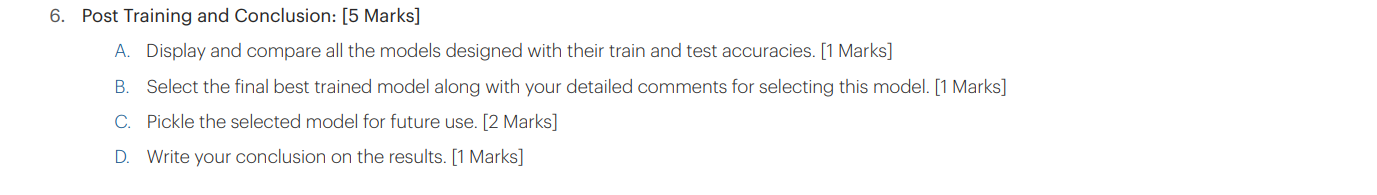

In [69]:
# Train predictions
train_predictions = [
    y_train_pred_lr_pca,
    y_train_pred_svm_pca,
    y_train_pred_knn_pca,
    y_train_pred_dt_pca,
    y_train_pred_nb_pca
]

# Test predictions
test_predictions = [
    y_test_pred_lr_pca,
    y_test_pred_svm_pca,
    y_test_pred_knn_pca,
    y_test_pred_dt_pca,
    y_test_pred_nb_pca
]

# Model names
model_names = [
    'Logistic Regression',
    'Support Vector Machine',
    'k-Nearest Neighbors',
    'Decision Tree',
    'Naive Bayes'
]

# Train accuracies
train_accuracies = [accuracy_score(y_train, pred) for pred in train_predictions]

# Test accuracies
test_accuracies = [accuracy_score(y_test, pred) for pred in test_predictions]

# Display the results
print(f"{'Model': <25}{'Train Accuracy': <20}{'Test Accuracy'}")
print("=" * 70)

for model, train_accuracy, test_accuracy in zip(model_names, train_accuracies, test_accuracies):
    print(f"{model: <25}{train_accuracy * 100:.2f}%{'': <4}{test_accuracy * 100:.2f}%")

Model                    Train Accuracy      Test Accuracy
Logistic Regression      70.04%    69.80%
Support Vector Machine   87.78%    83.79%
k-Nearest Neighbors      91.67%    86.69%
Decision Tree            100.00%    82.08%
Naive Bayes              67.61%    67.24%


Without Hypermeter tuning for the rest of the models, and considering the context of the semiconductor manufacturing dataset, the optimal choice for predicting yield types is the Random Forest model as it has a test accuracy of 89%, showcasing its effectiveness in discerning different yield types. 

In [73]:
import pickle

# Pickle the trained Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)